<a href="https://colab.research.google.com/github/matheus-mtz/mvp_puc_ed/blob/main/MVP_Matheus_Carvalho_ED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós-Graduação em Ciência de Dados e Analitycs - PUC-Rio**

## ***MVP - Sprint: Engenharia de dados***

### ***Uma análise sobre o desempenho de equipes de futebol masculino nas Top 5 ligas europeias entre 2014 e 2020***

####Autor: Matheus Martinez de Carvalho

#####Pontifícia Universidade Católica do Rio de Janeiro
#####Julho de 2024

#***Introdução***

---
O futebol moderno se encontra em um momento de explosão de dados, com informações valiosas fluindo de diversas fontes. A cada jogo, um universo de dados se abre para ser explorado, estatísticas como posse de bola, passes, chutes, faltas e cartões revelam as nuances das estratégias e do desempenho individual e coletivo. As estatísticas de times ao longo de temporadas, campeonatos e ligas diferentes fornecem um panorama detalhado da evolução e das tendências.

Diante desse volume imenso e em constante crescimento, torna-se crucial a implementação de um banco de dados robusto e bem estruturado, capaz de gerenciar essa riqueza de informações e extrair insights valiosos para o aprimoramento do esporte.

Este trabalho explorará o processo de criação de Data Warehouse em um case fictício sobre a análise de desempenho de equipes das cinco principais ligas europeias de futebol masculino entre 2014 e 2020. Serão abordados os aspectos técnicos da construção do Data Warehouse, desde a coleta, ingestão e armazenamento dos dados até a implementação de ferramentas de análise e visualização.


#***Objetivos***

---

Ao longo deste projeto, exploraremos as etapas essenciais para a construção do banco de dados, desde a verificação sobre a qualidade dos dados, a criação das tabelas e definição das relações entre elas até a implementação de consultas SQL para extrair insights relevantes. Neste contexto, o Databricks surge como uma plataforma poderosa para a construção de um banco de dados do tipo snowflake, utilizando as tabelas games, leagues, teams e TeamStats.

Utilizaremos o Databricks como ferramenta principal para a análise dos dados por meio de consultas em linguagem SQL.

**São objetivos deste trabalho:**

**(i)** construir um banco de dados robusto e escalável que atenda às necessidades de análise do futebol moderno, permitindo a exploração de diversos aspectos do esporte, desde o desempenho, as táticas e as estratégicas das equipes times;

**(ii)** validar a qualidade das informações do banco de dados reconstruindo a tabela final de cada liga por meio dos resultados dos jogos para o ano de 2020;

**(iii)** verificar o impacto de cartões amarelos e vermelhos sobre os resultados finais da Premier League no ano de 2020;

**(iv)** ranking de chutes ao alvo para resultar em gol para times da Premier League no ano de 2020;

**(v)**  times da Premier League com melhores aproveitamentos como mandantes e como visitantes no ano de 2020.

#***Coleta dos dados***

---

Na primeira etapa do processo de ETL (Extract, transform and load), os dados utilizados foram obtidos por meio da plataforma Kaggle em 04/07/2024 e podem ser encontradas em seu formato original no link abaixo:

**https://www.kaggle.com/datasets/technika148/football-database?select=shots.csv**

#***Catálogo de dados***

---

Diante dos objetivos de otimizar o uso do banco de dados e facilitar o entendimento das equipes que irão colaborar e usufruir dos dados para a geração de insights, foi criado um catálogo de dados para as tabelas disponíveis. No catálogo são disponibilizadas os atributos e seus conteúdos, regras de validação e exemplos de valores. O catálogo de dados pode ser acessado pelo link abaixo:

**https://drive.google.com/file/d/1-9Mn-2c9ywryDZNwe64wtNBnKQqq4TQ_/view?usp=sharing**


#***Qualidade dos dados***

---

Na segunda etapa do processo de ETL foi verificado a qualidade dos dados nas tabelas para garantir a confiabilidade e a integridade das informações armazenadas.

**Nesta etapa verificaremos:**

**(i)** a existência de dados faltantes e linhas duplicadas;

**(ii)** valores discrepantes e formatos incorretos de acordo com as regras de validação predefinidas;

**(iii)** realizar ajustes, caso haja a necessidade.


A fim de alcançar tais objetivos, foi desenvolvido um código em Python para verificar os pontos levantados nas tabelas que vão compor o banco de dados, este pode ser verificado na seção abaixo.

As regras de validação de dados podem ser conferidas no catálogo de dados do projeto.

---

###***Resultados***
- Para os datasets ***games*** e ***teamsstats***, através dos códigos apresentados abaixo, não foram verificados dados faltantes, linhas duplicadas ou dados fora das regras de validação definidas. A chave primária ***gameID*** também mostrou respeitar o princípio da **unicidade** sobre os atributos.

- Para os datasets ***leagues*** e ***teams*** foram realizadas conferências manuais pelo baixo volume de dados e a importância pela correta escrita dos nomes dos mesmos contidos nas tabelas. Nestes datasets também não foram necessários ajustes.


In [ ]:
import pandas as pd


In [ ]:
#importar dados
games = pd.read_csv("https://raw.githubusercontent.com/matheus-mtz/mvp_puc_ed/main/games.csv", sep=",")
#visulizar
games.head()

,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,awayProbability,homeGoalsHalfTime,awayGoalsHalfTime
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,2.843,3.999,3.158,1,0
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,3.574,0.35,2.926,0,0
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,2.988,4.337,2.675,0,1
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,6.422,2.057,1.521,3,0
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,1.461,2.159,638,0,1


In [ ]:
games.describe()

,gameID,leagueID,season,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,awayProbability,homeGoalsHalfTime,awayGoalsHalfTime
count,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000,12680.000000
mean,7877.707334,2.983912,2016.984148,135.324842,135.333517,1.533202,1.206625,104.320500,82.453652,136.543678,0.674054,0.526262
std,4753.774045,1.437191,2.000075,42.757999,42.767761,1.306732,1.167718,233.070895,200.776730,251.712969,0.830917,0.734664
min,81.000000,1.000000,2014.000000,71.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3812.750000,2.000000,2015.000000,101.000000,101.000000,1.000000,0.000000,3.308500,2.158000,2.675750,0.000000,0.000000
50%,7981.500000,3.000000,2017.000000,132.000000,132.000000,1.000000,1.000000,6.043000,2.848000,5.657000,0.000000,0.000000
75%,12023.250000,4.000000,2019.000000,163.000000,163.000000,2.000000,2.000000,9.273250,3.937000,139.000000,1.000000,1.000000
max,16135.000000,5.000000,2020.000000,262.000000,262.000000,10.000000,9.000000,998.000000,999.000000,999.000000,6.000000,5.000000


In [ ]:
#tipos de dados dos atributos
games.dtypes

gameID                 int64
leagueID               int64
season                 int64
date                  object
homeTeamID             int64
awayTeamID             int64
homeGoals              int64
awayGoals              int64
homeProbability      float64
drawProbability      float64
awayProbability      float64
homeGoalsHalfTime      int64
awayGoalsHalfTime      int64
dtype: object

In [ ]:
#altera o dtype das colunas homeProbability, drawProbability e awayProbability para float

# Replace commas with periods for decimal separators
games['homeProbability'] = games['homeProbability'].str.replace(',', '.').astype(float)
games['drawProbability'] = games['drawProbability'].str.replace(',', '.').astype(float)
games['awayProbability'] = games['awayProbability'].str.replace(',', '.').astype(float)


In [ ]:
#contamos valores NAs
games.isnull().sum()

gameID               0
leagueID             0
season               0
date                 0
homeTeamID           0
awayTeamID           0
homeGoals            0
awayGoals            0
homeProbability      0
drawProbability      0
awayProbability      0
homeGoalsHalfTime    0
awayGoalsHalfTime    0
dtype: int64

In [ ]:
# Verificar linhas duplicadas
duplicate_rows = games[games.duplicated()]

# Contar linhas duplicadas
num_duplicate_rows = len(duplicate_rows)

# Imprimir o número de linhas duplicadas
print(f"Número de linhas duplicadas: {num_duplicate_rows}")


Número de linhas duplicadas: 0


In [ ]:
# Contar valores repetidos na coluna gameID
duplicate_values = games['gameID'].value_counts()

# Verificar se há valores repetidos
has_duplicates = any(count > 1 for count in duplicate_values)

# Imprimir o resultado
if has_duplicates:
  print("Há valores repetidos na coluna gameID.")
else:
  print("Não há valores repetidos na coluna gameID.")


Não há valores repetidos na coluna gameID.


In [ ]:
#importar dados
teamstats = pd.read_csv("https://raw.githubusercontent.com/matheus-mtz/mvp_puc_ed/main/teamstats.csv", sep=",")
#visulizar
teamstats.head()

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D


In [ ]:
teamstats.describe()

,gameID,teamID,season,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards
count,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25359.000000,25360.000000
mean,7877.707334,135.329180,2016.984148,1.369913,1.340431,12.461751,4.317468,5.820465,11.165713,12.955560,4.977721,2.032257,0.103194
std,4753.680315,42.762037,2.000036,1.249864,0.851634,5.123449,2.471407,4.050207,6.337107,4.204289,2.831523,1.367856,0.322466
min,81.000000,71.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.897400,0.000000,0.000000,0.000000,0.000000
25%,3812.750000,101.000000,2015.000000,0.000000,0.701658,9.000000,3.000000,3.000000,7.103200,10.000000,3.000000,1.000000,0.000000
50%,7981.500000,132.000000,2017.000000,1.000000,1.184050,12.000000,4.000000,5.000000,9.720000,13.000000,5.000000,2.000000,0.000000
75%,12023.250000,163.000000,2019.000000,2.000000,1.813830,16.000000,6.000000,8.000000,13.400000,16.000000,7.000000,3.000000,0.000000
max,16135.000000,262.000000,2020.000000,10.000000,6.630490,47.000000,18.000000,42.000000,152.000000,33.000000,20.000000,9.000000,3.000000


In [ ]:
#tipos de dados dos atributos
teamstats.dtypes

gameID             int64
teamID             int64
season             int64
date              object
location          object
goals              int64
xGoals           float64
shots              int64
shotsOnTarget      int64
deep               int64
ppda             float64
fouls              int64
corners            int64
yellowCards      float64
redCards           int64
result            object
dtype: object

In [ ]:
teamstats.isnull().sum()

gameID           0
teamID           0
season           0
date             0
location         0
goals            0
xGoals           0
shots            0
shotsOnTarget    0
deep             0
ppda             0
fouls            0
corners          0
yellowCards      0
redCards         0
result           0
dtype: int64

In [ ]:
# Verificar linhas duplicadas
duplicate_rows2 = teamstats[teamstats.duplicated()]

# Contar linhas duplicadas
num_duplicate_rows2 = len(duplicate_rows2)

# Imprimir o número de linhas duplicadas
print(f"Número de linhas duplicadas: {num_duplicate_rows2}")


Número de linhas duplicadas: 0


In [ ]:
# Verifica se há somente duas aparições do mesmo gameID na coluna gameID
duplicate_values2 = teamstats['gameID'].value_counts()

# Verificar se há valores repetidos
has_duplicates2 = any(count > 2 for count in duplicate_values2)

# Imprimir o resultado
if has_duplicates2:
  print("Há valores repetidos na coluna gameID.")
else:
  print("Não há valores repetidos na coluna gameID.")


Não há valores repetidos na coluna gameID.


In [ ]:
#importar dados
teams = pd.read_csv("https://raw.githubusercontent.com/matheus-mtz/mvp_puc_ed/main/teams.csv", sep=",")
#visulizar
teams.head()

,teamID,name
0,71,Aston Villa
1,72,Everton
2,74,Southampton
3,75,Leicester
4,76,West Bromwich Albion


In [ ]:
#importar dados
leagues = pd.read_csv("https://raw.githubusercontent.com/matheus-mtz/mvp_puc_ed/main/leagues.csv", sep=",")
#visulizar
leagues.head()

,leagueID,name,understatNotation
0,1,Premier League,EPL
1,2,Serie A,Serie_A
2,3,Bundesliga,Bundesliga
3,4,La Liga,La_liga
4,5,Ligue 1,Ligue_1


#***Databricks: carregamento dos dados***
---
***Nesta etapa foi utilizada a versão voltada para aprendizado, Databricks Comunnity**

Na última etapa de ETL foram realizados os seguintes passos (estes serão ilustrados por imagens nas seções abaixo):
- criação de cluster de processamento de dados;
- criação das tabelas por carregamento manual.




##***Criação de cluster de processamento de dados***
---

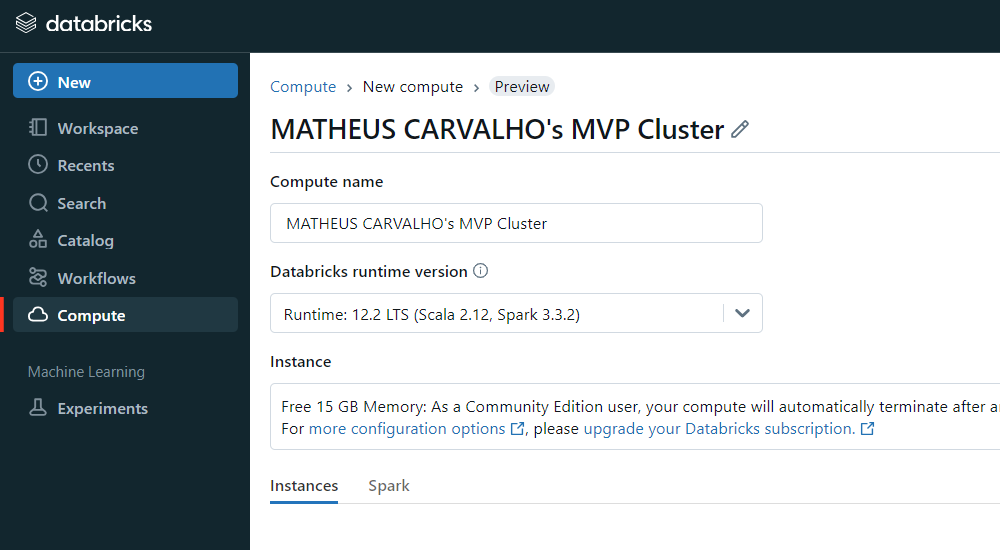

##***Criação das tabelas***
---

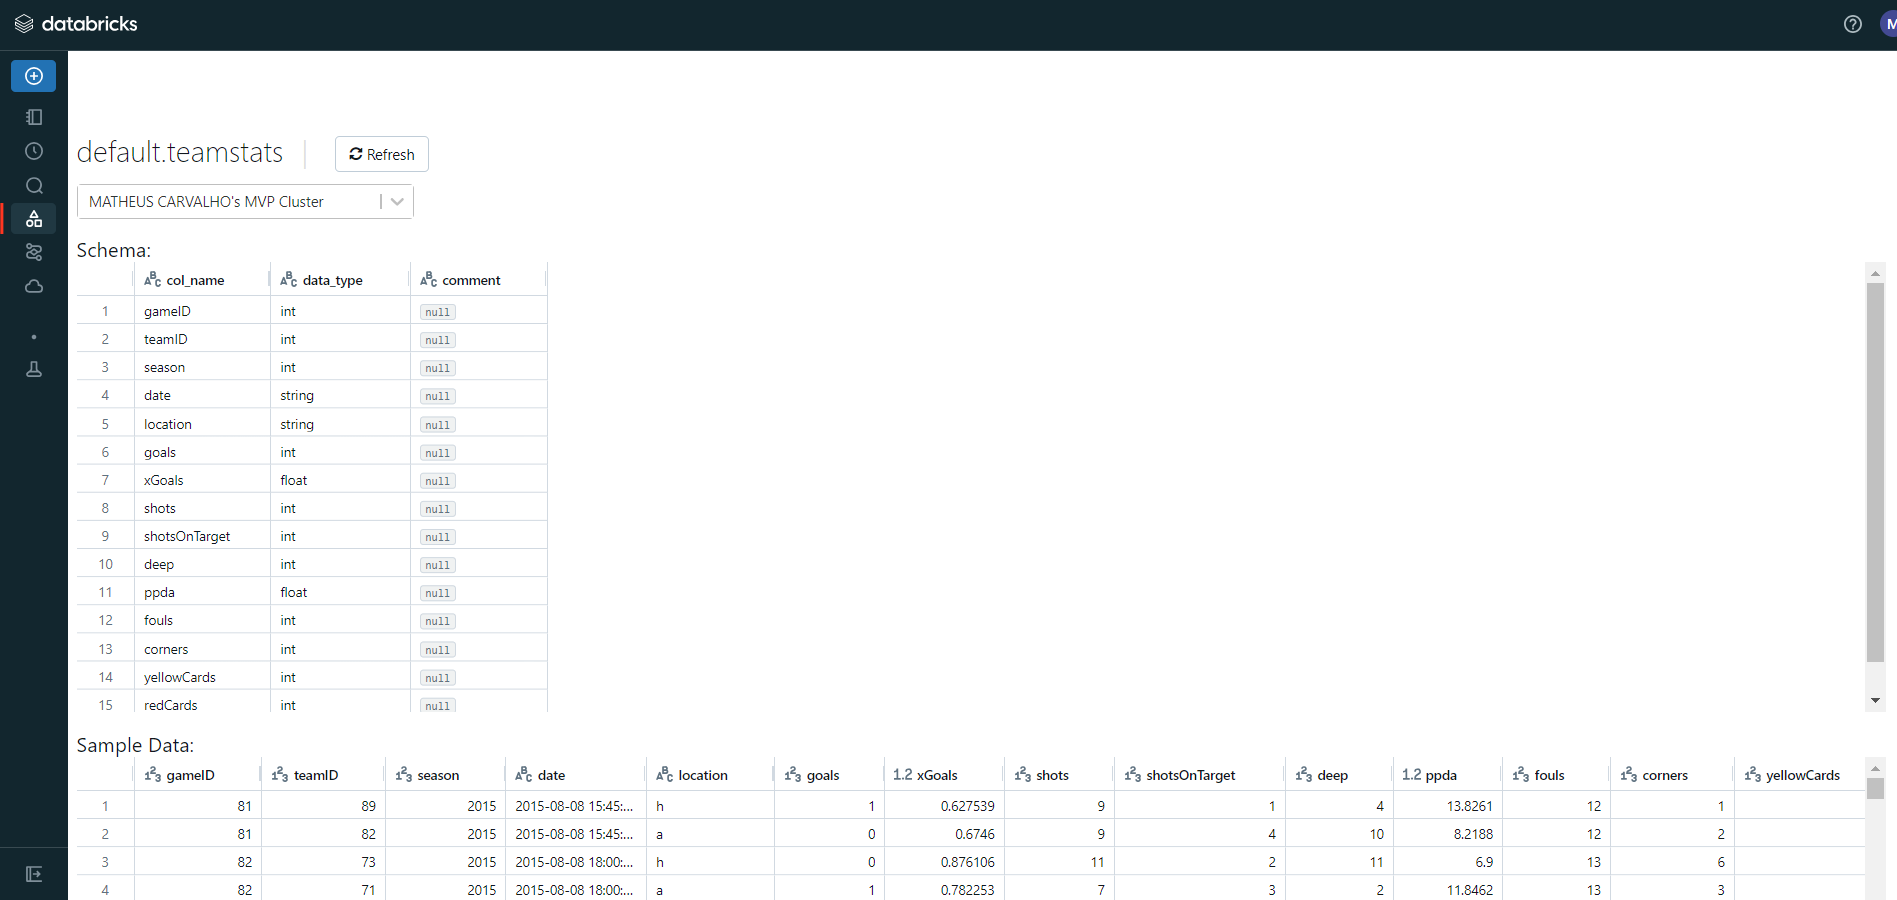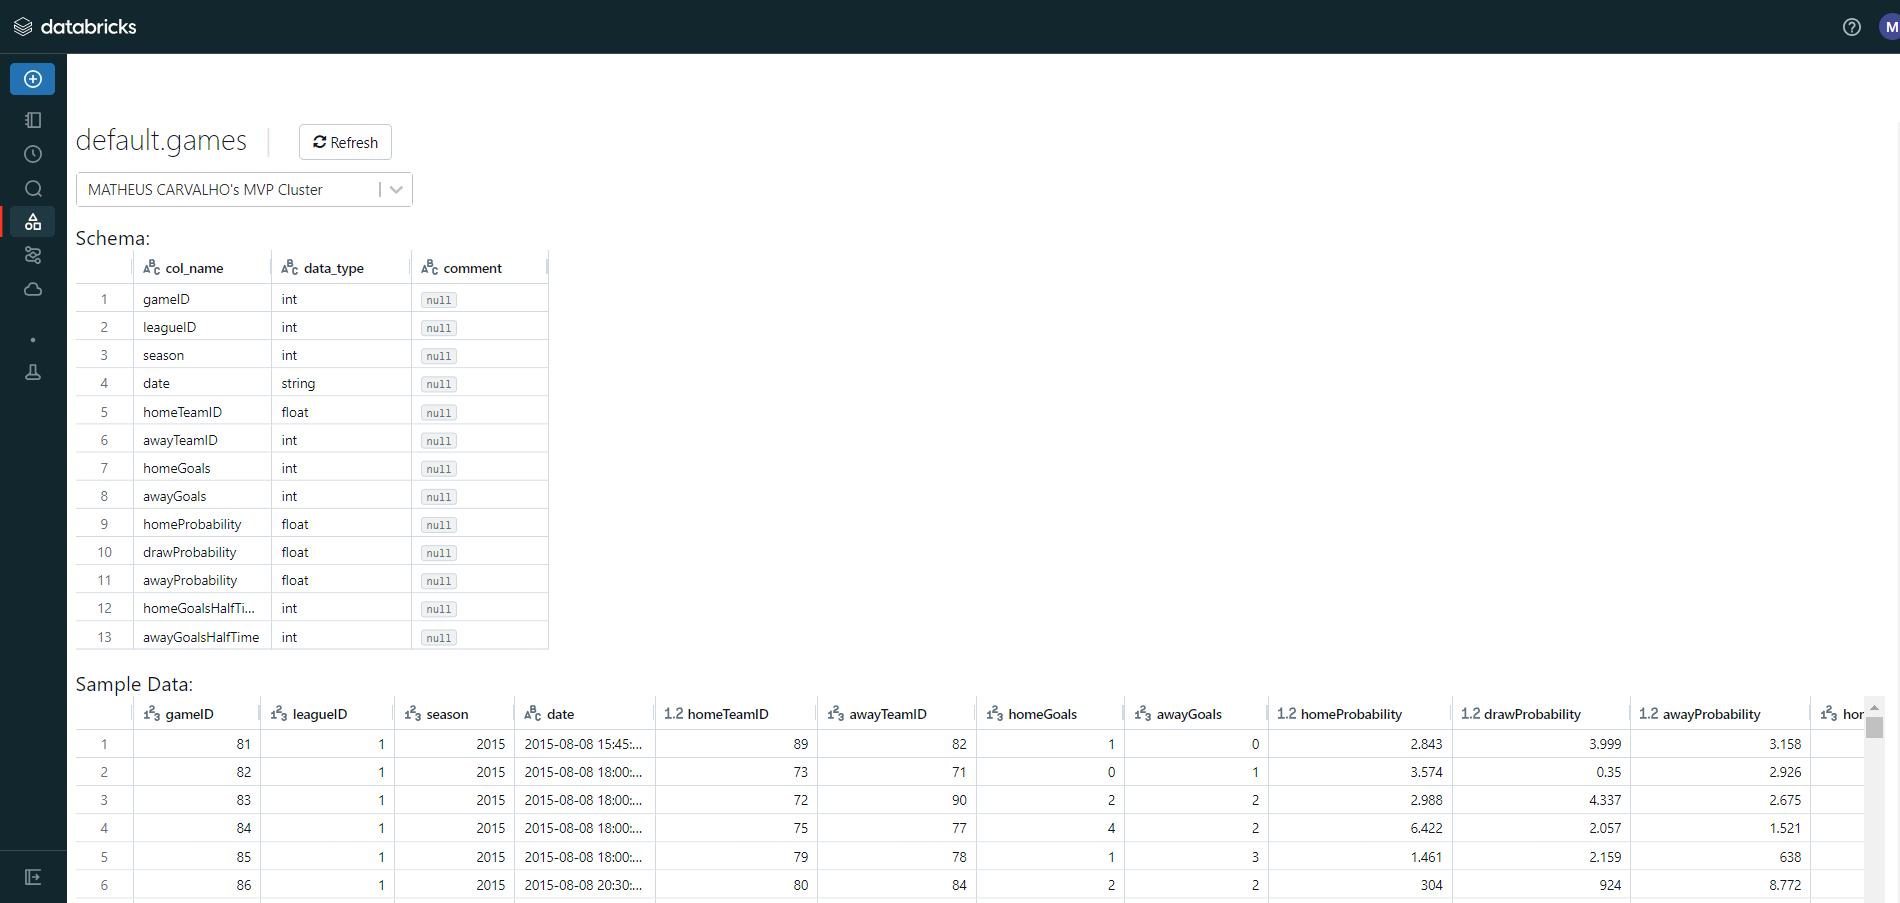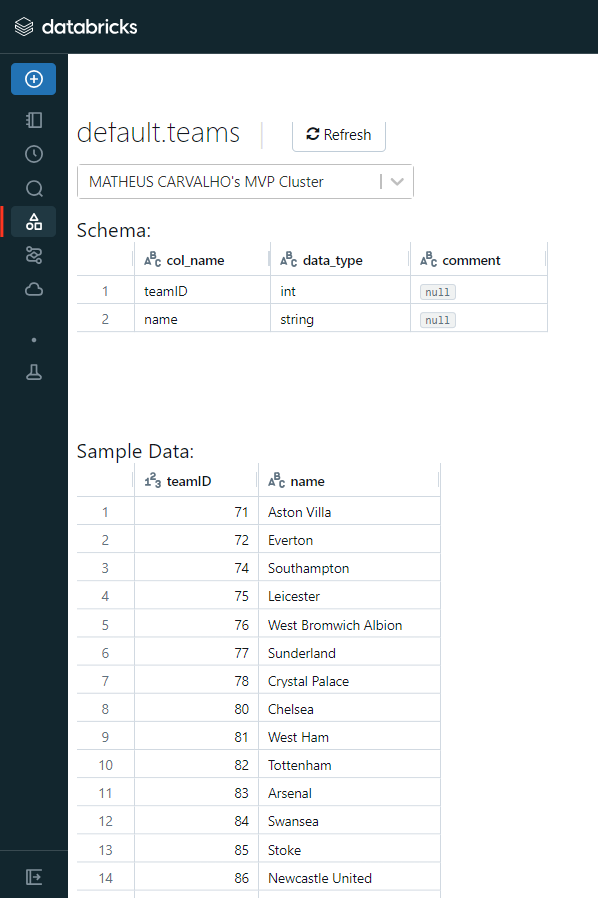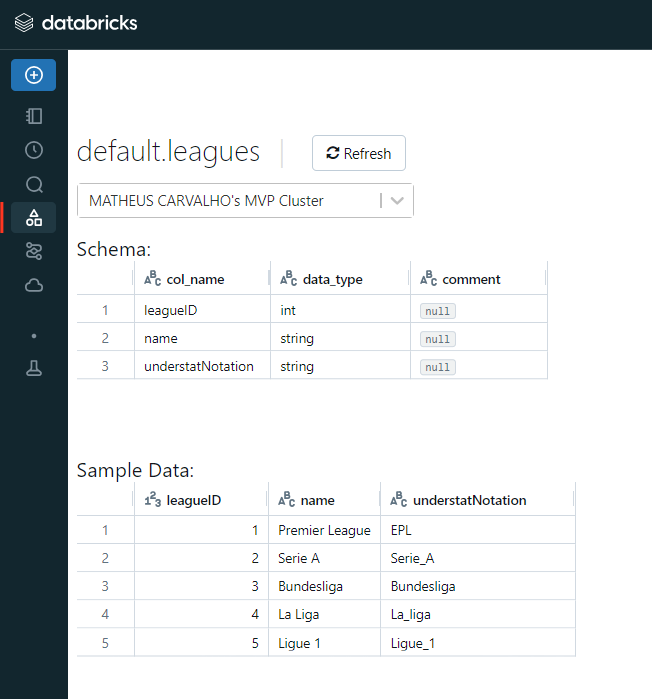

##***Databricks: Problemas propostos para o case***
---
Para este case, foram propostos na seção de ***objetivos*** ao início do presente trabalho os seguintes desafios a serem desenvolvidos por meio de ***consultas SQL*** no ***Databricks***:

**(i)** validar a qualidade das informações do banco de dados reconstruindo a tabela final de cada liga por meio dos resultados dos jogos para o ano de 2020;

**(ii)** verificar o impacto de cartões amarelos e vermelhos sobre os resultados finais da Premier League no ano de 2020;

**(iii)** ranking de chutes ao alvo para resultar em gol para times da Premier League no ano de 2020;

**(iv)**  times da Premier League com melhores aproveitamentos como mandantes e como visitantes no ano de 2020.

Nas próximas seções serão desenvolvidos os objetivos apresentados por meio da explicitação das consultas e dos resultados gerados.

##***1. Tabelas Finais para o temporada 2020/21***

---

###***Resultados***
**https://drive.google.com/file/d/1spDoGMAqEpCFx0KMstCw9g3nUPYCC7Ds/view?usp=sharing**

**Considerações:**

- As bases de dados se mostraram confiáveis e resultaram nos corretos números de pontos para as equipes ao final dos campeonatos;
- por simplificação, para este trabalho, somente foram utilizados os números de pontos conquistados para realizar o ranqueamento das equipes. Deste modo, houve pequenas diferenças em relação às tabelas oficiais devido aos critérios de desempate para times que obtiveram as mesmas quantidade de pontos.



***Imagem 1: Query SQL: Tabelas finais para a Temporada 2020/21 para as cinco ligas***

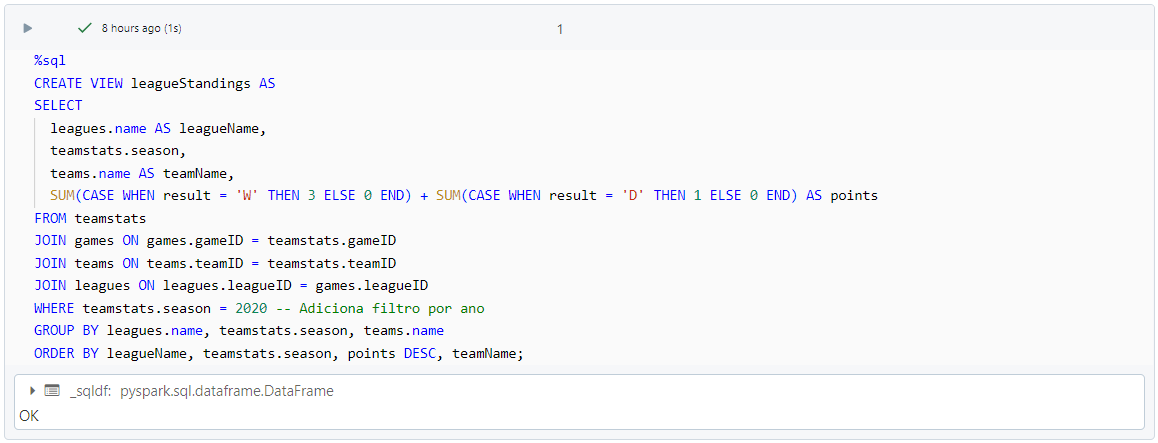

***1.2 Tabela final Premier League Temporada 2020/21***

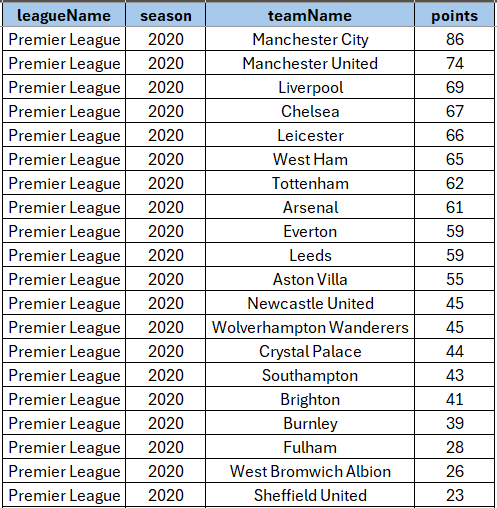

##***2. Ranking de cartões: Premier League temporada 2020/21***

---
###***Resultados:***
- Dentre os times que ficaram no Top 5 colocações no campeonato, apenas o Manchester United figurou entre as equipes mais foram punidas com cartões amarelos ficando em terceiro lugar com 64 cartões;
- a equipe mais punida com cartões amarelos foi a última colocada no campeonato, o Sheffild United (73 amarelos). A equipe recebeu 82,5% mais cartões do que o Liverpool (40), equipe menos punida com cartões amarelos;
- o time que recebeu o maior número de cartões vermelhos foi o Brighton (6), seguido pelo Arsenal com 5 cartões;
- apenas quatro times não tiveram jogadores expulsos na temporada: Leicester, Wolverhampton, Burnley e Liverpool;
- O Brighton, a segunda equipe que menos recebeu cartões amarelos (45), foi a que mais recebeu cartões vermelhos (6).

***Imagem 2: Query SQL: Ranking de cartões***
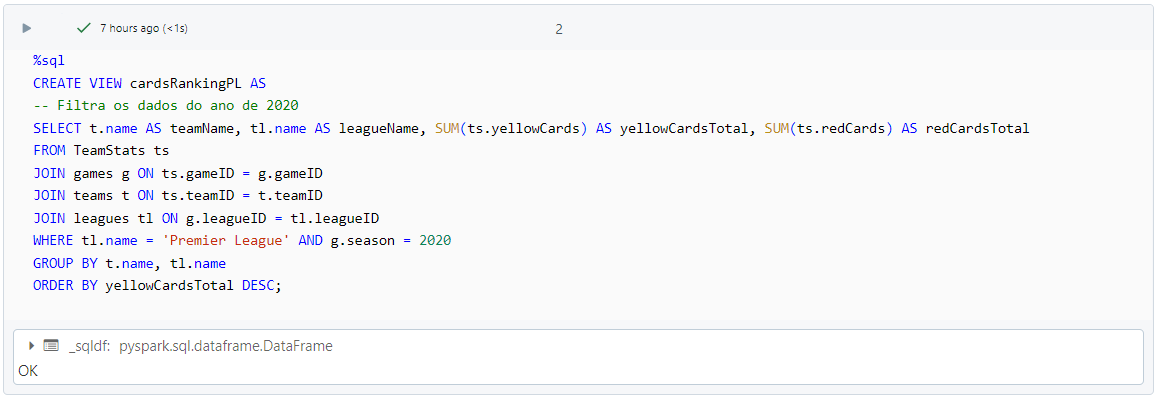

***Tabela Ranking de cartões Premier League Temporada 2020/21***


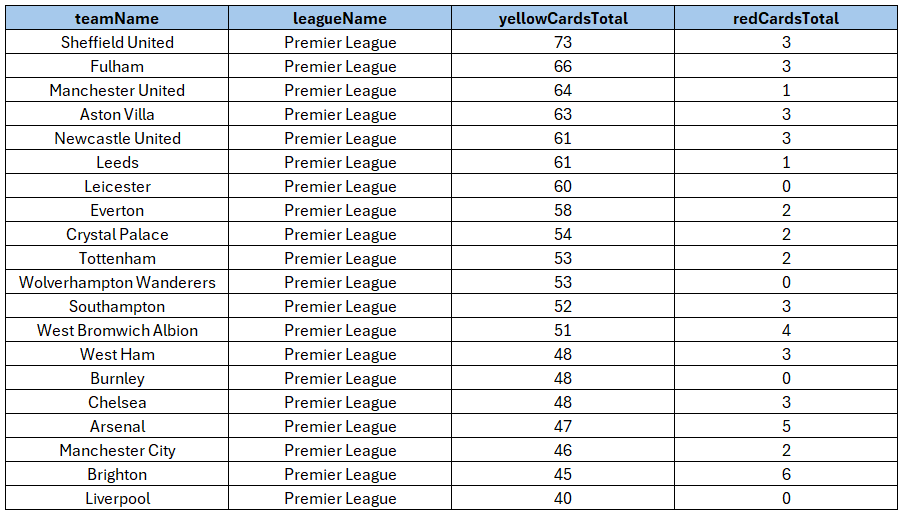

##***3. Ranking chutes no alvo para marcar um gol: Premier League temporada 2020/21***

---

###***Resultados***

- o time que precisou de menos chutes a gol para marcar foi o Tottenham com 2,59 chutes, a equipe terminou o campeonato 7ª colocação;
- em segundo lugar ficou o time campeão da temporada, o Manchester City (2,64);
- apesar da 4ª colocação no campeonato, o Chelsea foi a 16ª entre as vinte equipes no quesito transformar chutes no alvo em gol (3,59), o que pode ter impactado o desempenho da equipe na briga pelo título.

***Imagem 3: Query SQL: Chutes no alvo para marcar um gol***
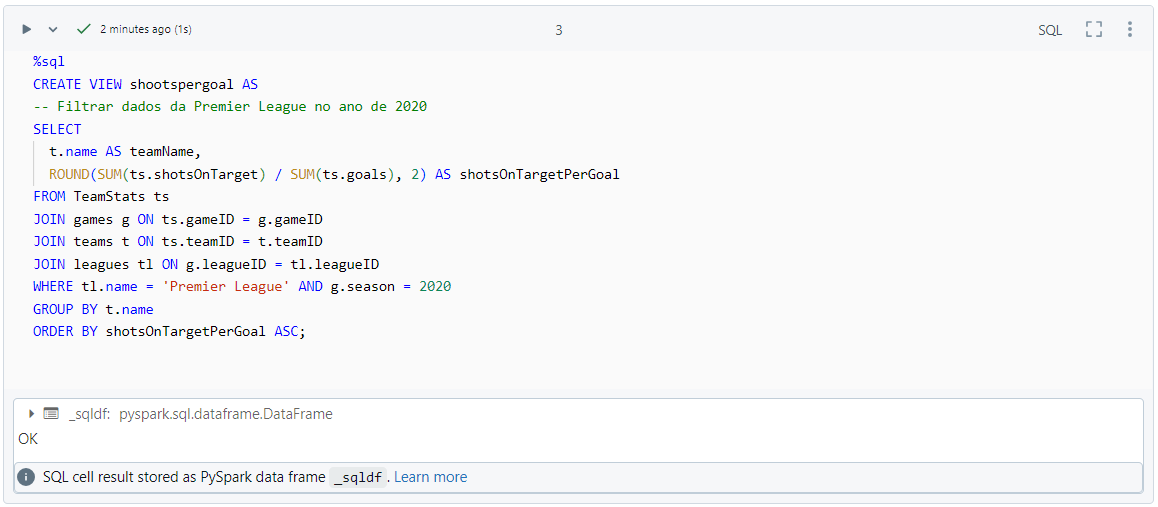

***Tabela Ranking chutes no alvo para marcar um gol***

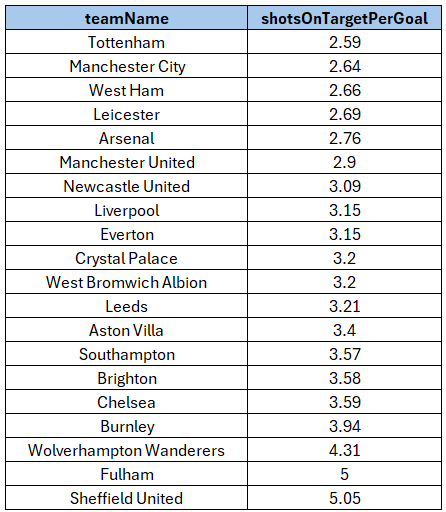

##***4. Ranking de aproveitamento como mandante e como visitante: Premier League temporada 2020/21***

---

###***Resultados***
- o time campeão da temporada Manchester City obteve 72% de aproveitamento em casa e 79% como visitante;
- o Manchester United (2º colocado no campeonato) teve desempenhos com diferenças relevantes, 54% como mandante e 75% visitante, o que o impactou fortemente na disputa pelo título.
- outro time com desempenho inferior jogando em casa do que como visitante foi o Leicester City que obteve aproveitamento de 49% como mandante e 67% como visitante.


***Imagem 4: Query SQL: Ranking de aproveitamento como mandante do jogo***
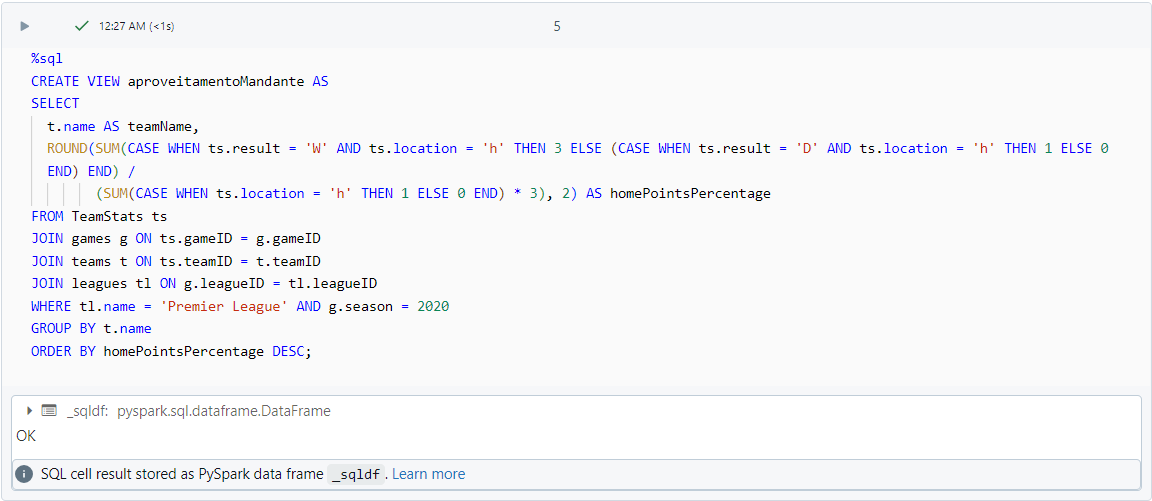

***Imagem 5: Query SQL: Ranking de aproveitamento como visitante do jogo***

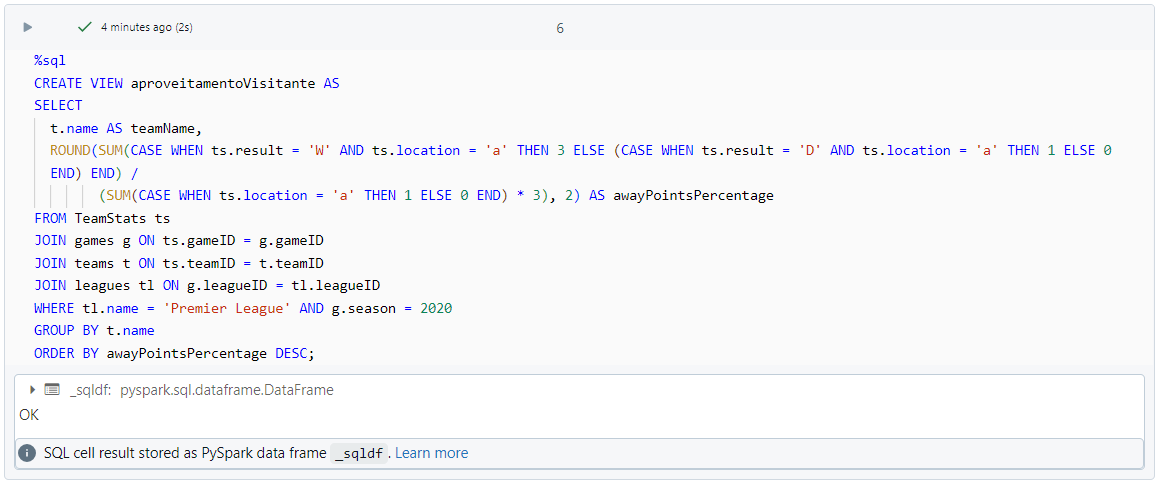

***Tabela Aproveitamento como mandante - Premier League Temporada 2020/21***

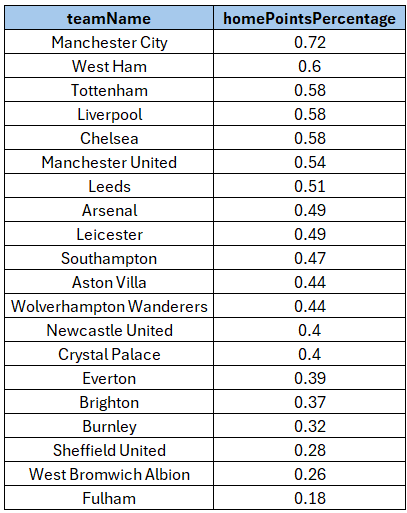

***Tabela Ranking de aproveitamento como visitante - Premier League Temporada 2020/21***

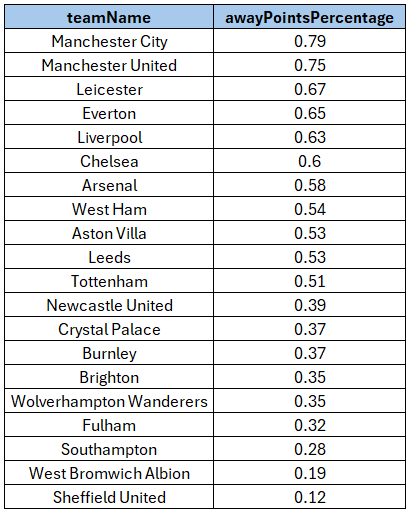

#***Considerações finais***

O presente trabalho abordou a construção de um Data Warehouse para análise de desempenho de equipes de futebol das cinco principais ligas europeias de futebol masculino entre 2014 e 2020. O Databricks foi utilizado como plataforma principal para a construção do banco de dados do tipo snowflake, utilizando as tabelas games, leagues, teams e TeamStats.

O banco de dados proposto se mostrou robusto e escalável, atendendo às necessidades de análise do futebol moderno. Através da implementação de consultas SQL, foi possível validar a qualidade das informações, verificar o impacto de cartões amarelos e vermelhos nos resultados, analisar a relação entre chutes ao alvo e gols marcados, e identificar os times com melhores aproveitamentos como mandantes e visitantes.

Os resultados obtidos demonstraram o potencial do Data Warehouse para auxiliar na tomada de decisões estratégicas no futebol. Através da análise aprofundada dos dados, é possível identificar pontos fortes e fracos das equipes, ajustar táticas e estratégias, otimizar o desempenho dos jogadores e, consequentemente, alcançar melhores resultados nas competições.

Vale ressaltar que este trabalho apresenta apenas um estudo de caso inicial. O Data Warehouse proposto pode ser expandido para incluir dados de outras ligas e competições, além de incorporar novas métricas e variáveis de análise. Adicionalmente, a implementação de técnicas de Machine Learning e Inteligência Artificial pode abrir novas possibilidades para a exploração dos dados e a geração de insights ainda mais valiosos para o futebol.

Em suma, o presente trabalho demonstra a viabilidade e a relevância da construção de um Data Warehouse para análise de desempenho de equipes de futebol. Através da utilização de ferramentas e técnicas adequadas, é possível transformar a vasta quantidade de dados disponíveis em conhecimento actionable, impulsionando o desenvolvimento e o sucesso das equipes no cenário futebolístico moderno.

#***Autoavaliação***

Ao longo da construção deste trabalho, tive a oportunidade de me aprofundar em Engenharia de Dados e na plataforma Databricks, um processo que me proporcionou um aprendizado significativo em diversas áreas.

No âmbito da Engenharia de Dados, adquiri um conhecimento sólido em arquitetura de Data Warehouse, dominando os princípios fundamentais para a construção de um sistema robusto e escalável, incluindo modelagem dimensional, armazenamento de dados, integração e qualidade dos dados. As técnicas de Extração, Transformação e Carregamento (ETL) se tornaram ferramentas essenciais para a coleta, ingestão e transformação de dados de diversas fontes em um formato adequado para análise. Aprimorei minhas habilidades em SQL para realizar consultas complexas, extraindo insights relevantes dos dados e gerando relatórios informativos.

Ao mergulhar na plataforma Databricks, adquiri domínio em sua utilização para a construção e gerenciamento do Data Warehouse. Criei clusters e notebooks, explorando o potencial da plataforma. O desenvolvimento de notebooks em Python e SQL se tornou uma prática recorrente para realizar diversas tarefas de análise de dados, desde a limpeza e transformação até a visualização e geração de insights. Implementar consultas SQL complexas para extrair informações relevantes das tabelas do Data Warehouse se tornou uma habilidade essencial para atender aos objetivos específicos do estudo.

Além dos conhecimentos técnicos específicos, este trabalho me proporcionou aprendizados valiosos em outras áreas. Reconheci a importância da qualidade dos dados para a obtenção de resultados confiáveis e precisos nas análises.

A experiência proporcionada por este trabalho me credencia para atuar em projetos reais de análise de dados em diversos setores. Acredito que o aprendizado contínuo é fundamental para o sucesso na área de Engenharia de Dados.